<a href="https://colab.research.google.com/github/deybvagm/natural-language-processing/blob/master/sarcasm_comparison_NN_LSTM_GRU_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of different neural-network-based models applied to the Sarcasm dataset

The aim of this notebook is to compare different models to solve a binary classification problem. The dataset used is the sarcasm dataset in which a bunch of sentences is given and the classification task is to determine whether a sentence is sarcastic or not.

The models used are:

- Standard neural network
- Single Layer LSTM (Bidirectional)
- 2 Layer LSTM (Bidirectional)
- Bidirectional GRU
- CNN with GlobalAveragePooling1D
- CNN with GlobalMaxPooling1D


No regularization techniques are used for the models

## Importing libraries and downloading the dataset

In [0]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \
    -O /tmp/sarcasm.json

--2019-09-02 12:24:15--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.128, 2607:f8b0:400e:c08::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘/tmp/sarcasm.json’

/tmp/sarcasm.json   100%[===================>]   5.38M  --.-KB/s    in 0.05s   

2019-09-02 12:24:16 (118 MB/s) - ‘/tmp/sarcasm.json’ saved [5643545/5643545]



## Hyperparameters definition

In [0]:
vocab_size = 1000
embedding_dim = 16
max_length = 120
oov_tok = '<OOV>'
trunc_type = 'post'
padding_type = 'post'
training_size = 20000

In [0]:
with open('/tmp/sarcasm.json') as json_file:
  datastore = json.load(json_file)

In [0]:
sentences = []
labels = []

In [0]:
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
len(sentences)

26709

In [0]:

sentences[:5]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
 "mom starting to fear son's web series closest thing she will have to grandchild",
 'boehner just wants wife to listen, not come up with alternative debt-reduction ideas',
 'j.k. rowling wishes snape happy birthday in the most magical way']

## Preprocessing the dataset

The first step here is to split the sentences into two different sets, one for training and one for testing

The second step consist in preprocess the sentences to convert into a numeric representation and then pad the sentences to match a desired length size per sentence

In [0]:
train_sentences = sentences[:training_size]
train_labels = labels[:training_size]

test_sentences = sentences[training_size:]
test_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.show()

## Models

Different models are defined in order to compare performance on the dataset. Specifically a standard neural network, a single layer LSTM, a 2 layer LSTM, a GRU and a CNN are used

In [0]:
num_epochs = 10

In [0]:
import numpy as np

train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

### Standard neural network

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


W0828 23:15:10.891471 139868996843392 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 16,109
Trainable params: 16,109
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 4s 222us/sample - loss: 0.6825 - accuracy: 0.5603 - val_loss: 0.6720 - val_accuracy: 0.5633
Epoch 2/10
20000/20000 [====================

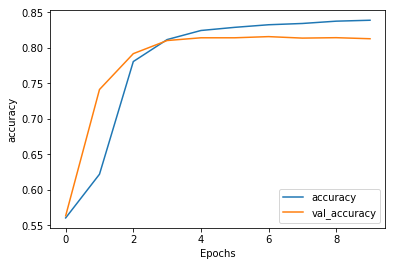

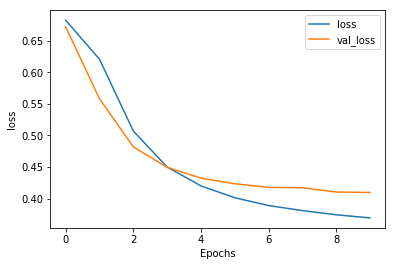

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### Single layer LSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               41472     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 65,793
Trainable params: 65,793
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 45s 2ms/sample - loss: 0.4556 - accuracy: 0.7757 - val_loss: 0.3930 - val_accuracy: 0.8222
Epoch 2/10
20000/20000 [=====================

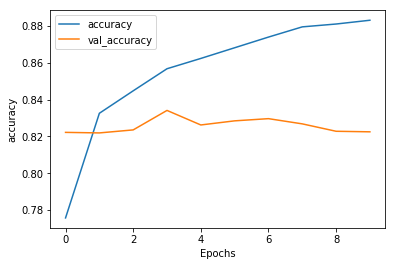

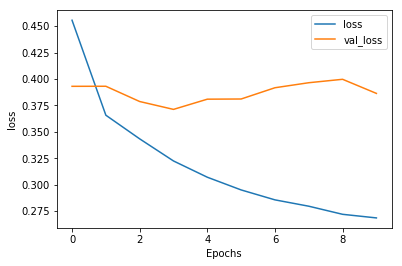

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### 2 layer LSTM

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 120, 128)          41472     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 102,913
Trainable params: 102,913
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 88

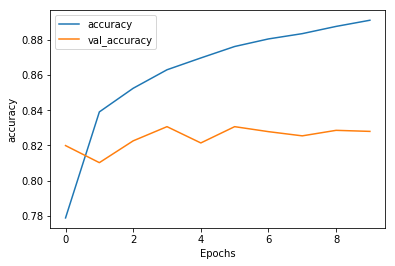

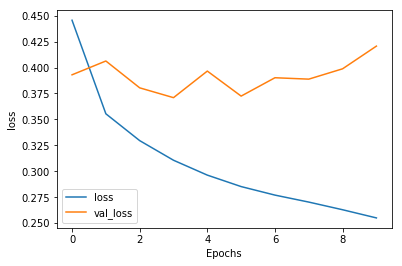

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

### GRU

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


W0829 11:08:47.100372 139754098055040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0829 11:08:47.104255 139754098055040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0829 11:08:47.113004 139754098055040 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           16000     
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                9408      
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 25,805
Trainable params: 25,805
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 398s 20ms/sample - loss: 0.4609 - acc: 0.7570 - val_loss: 0.3949 - val_acc: 0.8179
Epoch 2/10
20000/20000 [==============================]

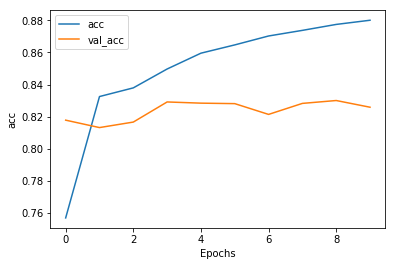

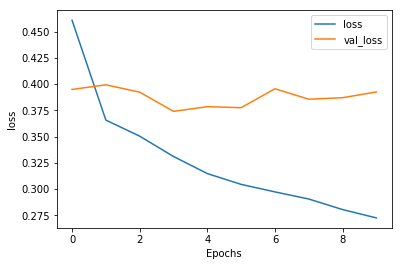

In [0]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

### CNN with MaxPooling

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 116, 128)          10368     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 7s 3

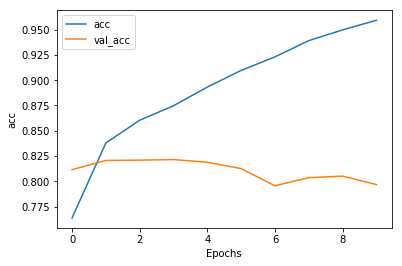

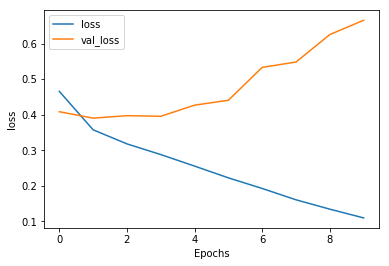

In [0]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

### CNN with AveragePooling

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

print(model.summary())

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 116, 128)          10368     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                3096      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 29,489
Trainable params: 29,489
Non-trainable params: 0
_________________________________________________________________
None
Train on 20000 samples, validate on 6709 samples
Epoch 1/10
20000/20000 [==============================] - 5s 2

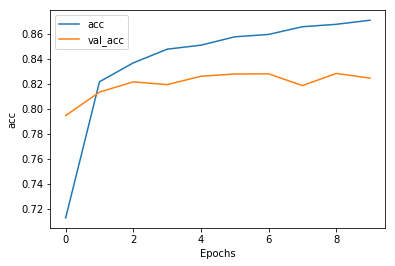

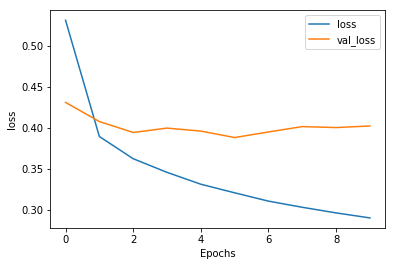

In [0]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sequence(sequence):
  return ' '.join([reverse_word_index.get(word_num, '?') for word_num in sequence])

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')

for word_num in range(1, vocab_size):
  embedding = weights[word_num]
  word = reverse_word_index[word_num]
  out_m.write(word + '\n')
  out_v.write('\t'.join([str(i) for i in embedding]) + '\n')
out_v.close()
out_m.close()

(1000, 16)


In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')